<a href="https://colab.research.google.com/github/Ashish-K-A/British_Airways_VI/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scrape the data from web

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [21]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [22]:
df = pd.DataFrame()
df['reviews'] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flying A380 business class ...
1,✅ Trip Verified | British Airways absolutely ...
2,✅ Trip Verified | My recent experience with B...
3,✅ Trip Verified | This is to express our disp...
4,✅ Trip Verified | I flew London to Malaga on ...


In [23]:
df.to_csv("/content/drive/MyDrive/Data_Science/British_Airways/reviews.csv",index = False)

# Read the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/British_Airways/reviews.csv')
df.head()

,reviews
0,✅ Trip Verified | Flying A380 business class ...
1,✅ Trip Verified | British Airways absolutely ...
2,✅ Trip Verified | My recent experience with B...
3,✅ Trip Verified | This is to express our disp...
4,✅ Trip Verified | I flew London to Malaga on ...


In [4]:
df.shape

(1000, 1)

# **Data preprocessing**

### 1) Text Cleaning
### 2) Tokenization
### 3) POS tagging
### 4) Stopwords removal
### 5) Obtaining the stem words

## Text Cleaning

In [5]:
df['verification'] = df.reviews.str.split('|',expand=True)[0]
df['cus_reviews'] = df.reviews.str.split('|',expand=True)[1]

df

,reviews,verification,cus_reviews
0,✅ Trip Verified | Flying A380 business class ...,✅ Trip Verified,Flying A380 business class should be a pleas...
1,✅ Trip Verified | British Airways absolutely ...,✅ Trip Verified,British Airways absolutely does not care. My...
2,✅ Trip Verified | My recent experience with B...,✅ Trip Verified,My recent experience with British Airways wa...
3,✅ Trip Verified | This is to express our disp...,✅ Trip Verified,This is to express our displeasure and conce...
4,✅ Trip Verified | I flew London to Malaga on ...,✅ Trip Verified,I flew London to Malaga on 27 August in Club...
...,...,...,...
995,✅ Trip Verified | Heathrow to Athens on A321....,✅ Trip Verified,Heathrow to Athens on A321. Arrived at the a...
996,✅ Trip Verified | London to Bangkok. I am not ...,✅ Trip Verified,London to Bangkok. I am not a fan if the BA c...
997,✅ Trip Verified | Abu Dhabi to London. Althou...,✅ Trip Verified,"Abu Dhabi to London. Although a BA flight, t..."
998,✅ Trip Verified | Gatwick to Orlando. Stains ...,✅ Trip Verified,"Gatwick to Orlando. Stains on the seat, cott..."


In [6]:
df.drop('reviews',axis=1,inplace= True)
df.head()

,verification,cus_reviews
0,✅ Trip Verified,Flying A380 business class should be a pleas...
1,✅ Trip Verified,British Airways absolutely does not care. My...
2,✅ Trip Verified,My recent experience with British Airways wa...
3,✅ Trip Verified,This is to express our displeasure and conce...
4,✅ Trip Verified,I flew London to Malaga on 27 August in Club...


In [7]:
df['verification'].value_counts()

✅ Trip Verified     797
Not Verified        201
❎ Not Verified        2
Name: verification, dtype: int64

In [8]:
import re
def clean(text):
  text = re.sub('[^A-Za-z]+', ' ',str(text))
  return text

  # cleaning both cus_reviews and verification column
df['Cleaned Reviews'] = df['cus_reviews'].apply(clean)
df['verification'] = df['verification'].apply(clean)

df.head()

,verification,cus_reviews,Cleaned Reviews
0,Trip Verified,Flying A380 business class should be a pleas...,Flying A business class should be a pleasure ...
1,Trip Verified,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...
2,Trip Verified,My recent experience with British Airways wa...,My recent experience with British Airways was...
3,Trip Verified,This is to express our displeasure and conce...,This is to express our displeasure and concer...
4,Trip Verified,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...


In [9]:
df['verification']= df['verification'].apply(lambda x: x.lstrip())

In [10]:
df['verification'].value_counts()

Trip Verified     797
Not Verified      203
Name: verification, dtype: int64

In [11]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ,'N':wordnet.NOUN,'V':wordnet.VERB,'R': wordnet.ADV}

def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))
  #print(tags)

  new_list = []

  for word,tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      new_list.append(tuple([word,pos_dict.get(tag[0])]))
      #print(tag[0])
      #print(pos_dict.get(tag[0]))

  return new_list

df['POS_tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,verification,cus_reviews,Cleaned Reviews,POS_tagged
0,Trip Verified,Flying A380 business class should be a pleas...,Flying A business class should be a pleasure ...,"[(Flying, v), (business, n), (class, n), (plea..."
1,Trip Verified,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...,"[(British, a), (Airways, n), (absolutely, r), ..."
2,Trip Verified,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (..."
3,Trip Verified,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)..."
4,Trip Verified,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,..."


Obrtaining the stem words - lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
  lmt_new = " "
  for word,pos in pos_data:
    if not pos:
      lmt = word
      lmt_new = lmt_new+" "+lmt
    else:
      lmt = wordnet_lemmatizer.lemmatize(word,pos=pos)
      lmt_new = lmt_new+" "+lmt
  return lmt_new

df['Lemmatized'] = df['POS_tagged'].apply(lemmatize)

In [14]:
df.head()

,verification,cus_reviews,Cleaned Reviews,POS_tagged,Lemmatized
0,Trip Verified,Flying A380 business class should be a pleas...,Flying A business class should be a pleasure ...,"[(Flying, v), (business, n), (class, n), (plea...",Flying business class pleasure BA make disas...
1,Trip Verified,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...,"[(British, a), (Airways, n), (absolutely, r), ...",British Airways absolutely care reserve seat...
2,Trip Verified,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (...",recent experience British Airways horrendous...
3,Trip Verified,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)...",express displeasure concern regard flight It...
4,Trip Verified,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly London Malaga August Club Europe stand a...


# Sentiment Analysis using VADER

In [15]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [16]:
from vaderSentiment.vaderSentiment import  SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
  vs = analyzer.polarity_scores(review)
  return vs['compound']

df['sentiment'] = df['Lemmatized'].apply(vadersentimentanalysis)

def vader_analysis(compound):
  if compound>=0.5:
    return "Positive"
  elif compound<0:
    return "Negetive"
  else:
    return "Neutral"

df['Analysis'] = df['sentiment'].apply(vader_analysis)

In [17]:
df.head()

,verification,cus_reviews,Cleaned Reviews,POS_tagged,Lemmatized,sentiment,Analysis
0,Trip Verified,Flying A380 business class should be a pleas...,Flying A business class should be a pleasure ...,"[(Flying, v), (business, n), (class, n), (plea...",Flying business class pleasure BA make disas...,-0.4243,Negetive
1,Trip Verified,British Airways absolutely does not care. My...,British Airways absolutely does not care My r...,"[(British, a), (Airways, n), (absolutely, r), ...",British Airways absolutely care reserve seat...,-0.9022,Negetive
2,Trip Verified,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (...",recent experience British Airways horrendous...,-0.9272,Negetive
3,Trip Verified,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)...",express displeasure concern regard flight It...,-0.4588,Negetive
4,Trip Verified,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly London Malaga August Club Europe stand a...,-0.7430,Negetive


In [18]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    490
Negetive    405
Neutral     105
Name: Analysis, dtype: int64

In [19]:
df.groupby('verification')['Analysis'].value_counts()

verification    Analysis
Not Verified    Positive     94
                Negetive     84
                Neutral      25
Trip Verified   Positive    396
                Negetive    321
                Neutral      80
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x7b5f977624a0>,
 [Text(0.03455180204558485, 1.0994572174374968, 'Positive'),
  Text(-0.3888222626454037, -1.0289884586676903, 'Negetive'),
  Text(1.0406939150599417, -0.35630910058151916, 'Neutral')],
 [Text(0.018846437479409915, 0.5997039367840891, '49.0%'),
  Text(-0.21208487053385655, -0.5612664320005583, '40.5%'),
  Text(0.5676512263963318, -0.1943504184990104, '10.5%')])

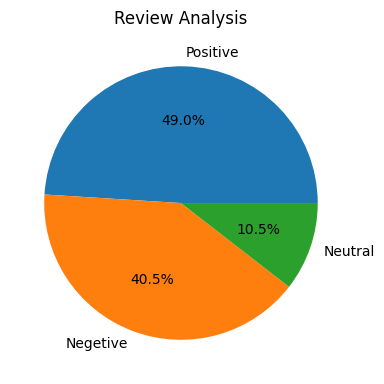

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,7))

plt.subplot(1,3,2)
plt.title("Review Analysis")
plt.pie(vader_counts.values, labels= vader_counts.index,autopct='%1.1f%%' )


In [23]:
df.to_csv("BA_reviews.csv")

## Word Cloud

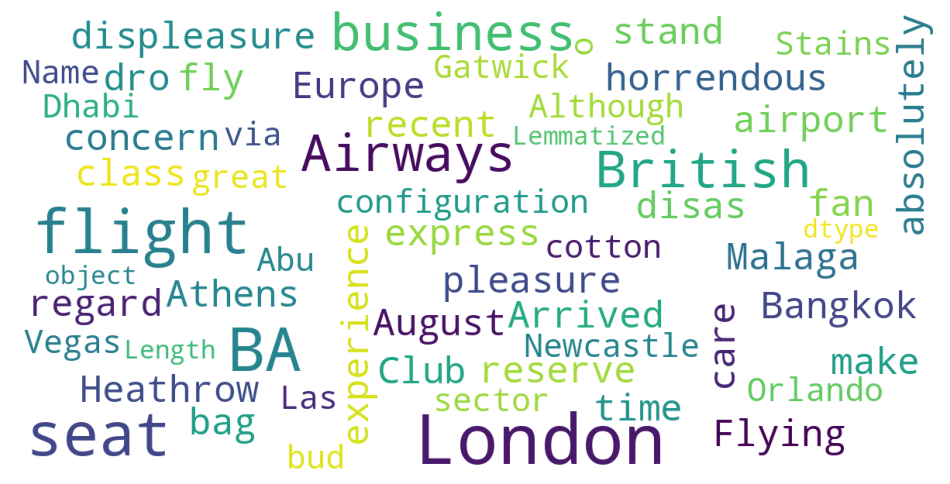

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemmatized)